In [1]:
source('/hpc/users/torred23/pipelines/support/init.R')

In [2]:
source('/hpc/users/torred23/pipelines/GuccioneLab/genome-indices/pipeline/scripts/alignment.R')

In [3]:
infiles <- Sys.glob('/hpc/users/torred23/pipelines/GuccioneLab/covid-tcell/hydra/s2-alignment.dir/star/*/*out.tab')
star_dataframe <- aggregate_counts(infiles, method='star', genome='hg38')
head(star_dataframe)

,1A_S1_R1_001,1B_S2_R1_001,1C_S3_R1_001,1E_S4_R1_001,1F_S5_R1_001,1G_S6_R1_001,3A_S7_R1_001,3B_S8_R1_001,3C_S9_R1_001,3D_S10_R1_001,⋯,5C_S15_R1_001,5D_S16_R1_001,5E_S17_R1_001,5G_S18_R1_001,7A_S19_R1_001,7B_S20_R1_001,7C_S21_R1_001,7D_S22_R1_001,7E_S23_R1_001,7F_S24_R1_001
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003,42,42,26,22,38,16,30,18,28,32,⋯,16,14,10,24,16,12,24,18,38,24
ENSG00000000005,8,0,2,0,0,0,0,0,0,2,⋯,2,0,0,0,0,0,0,0,0,0
ENSG00000000419,1622,1542,1042,1530,1494,1132,1686,1808,1706,1448,⋯,1456,1270,1120,1302,1376,1208,1472,1710,1574,1596
ENSG00000000457,816,904,596,886,780,758,634,422,802,1146,⋯,710,594,524,678,598,560,612,750,668,848
ENSG00000000460,164,190,140,162,140,102,110,98,162,188,⋯,144,114,112,150,262,132,178,232,190,248
ENSG00000000938,21454,29264,15542,31384,24234,25276,26542,24120,30468,22640,⋯,22944,20328,20232,22030,17380,18940,21722,26046,29584,26898


In [5]:
source('/hpc/users/torred23/pipelines/GuccioneLab/genome-indices/pipeline/scripts/alignment.R')
infiles <- Sys.glob('/hpc/users/torred23/pipelines/GuccioneLab/covid-tcell/hydra/s2-alignment.dir/star/*/*out.tab')
star_dataframe <- aggregate_counts(infiles, method='star', genome='hg38')
head(star_dataframe)

Warning message:
“non-unique values when setting 'row.names': ‘counts’, ‘ensembl_gene_id’, ‘V3’, ‘V4’”


ERROR: Error in `.rowNamesDF<-`(x, value = value): duplicate 'row.names' are not allowed


In [ ]:
suppressPackageStartupMessages

In [4]:
infiles <- Sys.glob('/hpc/users/torred23/pipelines/GuccioneLab/covid-tcell/hydra/s2-alignment.dir/kallisto/*/abundance.h5')
kallisto_dataframe <- aggregate_counts(infiles, method='kallisto', txOut=FALSE, genome='hg38')$counts
head(kallisto_dataframe)

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 


transcripts missing from tx2gene: 1419

summarizing abundance

summarizing counts

summarizing length



,1A_S1_R1_001,1B_S2_R1_001,1C_S3_R1_001,1E_S4_R1_001,1F_S5_R1_001,1G_S6_R1_001,3A_S7_R1_001,3B_S8_R1_001,3C_S9_R1_001,3D_S10_R1_001,⋯,5C_S15_R1_001,5D_S16_R1_001,5E_S17_R1_001,5G_S18_R1_001,7A_S19_R1_001,7B_S20_R1_001,7C_S21_R1_001,7D_S22_R1_001,7E_S23_R1_001,7F_S24_R1_001
ENSG00000000003,51.05216,40.79417,32.23023,33.15891,44.46954,28.42961,23.3118,32.25710,27.76952,33.67071,⋯,25.53284,16.51529,12.08209,23.44132,18.27322,14.45599,17.61952,22.95925,37.04031,35.04609
ENSG00000000005,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,1.00000,⋯,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
ENSG00000000419,750.00000,727.00000,496.00000,721.00000,705.00000,542.00000,787.0000,853.00000,814.00000,697.00000,⋯,683.00000,566.00000,523.00000,627.00000,646.00000,561.00000,702.00000,826.00000,730.00000,755.00000
ENSG00000000457,603.07870,646.72254,448.09453,682.70977,558.08977,519.49518,521.2949,431.25536,593.09671,780.54047,⋯,491.88729,469.26460,381.83138,522.13590,474.65664,436.29466,457.43441,590.91226,538.29130,637.10988
ENSG00000000460,145.13014,135.47068,87.20398,119.15808,117.41435,92.39445,89.9817,98.06563,107.90646,134.14691,⋯,98.03182,79.98037,75.98264,95.93890,151.43542,84.70761,132.63278,164.68933,123.11935,161.07990
ENSG00000000938,10498.00000,14261.00000,7633.00000,15374.00000,11941.00000,12390.00000,12951.0000,11913.00000,14857.00000,10971.00000,⋯,11255.00000,9963.00000,9904.00000,10703.00000,8539.00000,9219.00000,10615.00000,12813.00000,14505.00000,13227.00000


In [6]:
infiles <- Sys.glob('/hpc/users/torred23/pipelines/GuccioneLab/covid-tcell/hydra/s2-alignment.dir/salmon/*/quant.sf')
salmon_dataframe <- aggregate_counts(infiles, method='salmon', txOut=FALSE, genome='hg38')$counts
head(salmon_dataframe)

reading in files with read_tsv

1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
21 
22 
23 
24 


transcripts missing from tx2gene: 1399

summarizing abundance

summarizing counts

summarizing length



,1A_S1_R1_001,1B_S2_R1_001,1C_S3_R1_001,1E_S4_R1_001,1F_S5_R1_001,1G_S6_R1_001,3A_S7_R1_001,3B_S8_R1_001,3C_S9_R1_001,3D_S10_R1_001,⋯,5C_S15_R1_001,5D_S16_R1_001,5E_S17_R1_001,5G_S18_R1_001,7A_S19_R1_001,7B_S20_R1_001,7C_S21_R1_001,7D_S22_R1_001,7E_S23_R1_001,7F_S24_R1_001
ENSG00000000003,63.069,47.140,48.477,30.245,55.329,55.116,45.145,44.165,36.045,47.729,⋯,25.352,20.625,15.579,28.737,23.009,15.677,28.657,18.495,33.825,31.964
ENSG00000000005,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,⋯,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ENSG00000000419,774.000,727.001,493.000,725.000,695.999,539.000,803.000,869.000,819.000,689.000,⋯,693.001,595.001,526.001,616.000,651.000,571.998,693.000,808.000,746.000,758.000
ENSG00000000457,512.157,558.581,362.165,556.343,481.212,458.608,421.093,295.813,482.448,674.670,⋯,434.196,379.806,333.059,431.589,379.654,348.320,397.923,465.959,410.078,496.228
ENSG00000000460,177.893,200.709,126.857,168.994,169.494,136.450,133.164,133.897,144.109,224.948,⋯,129.273,101.909,104.502,120.068,166.325,118.184,163.449,208.258,145.724,217.340
ENSG00000000938,9894.000,13571.000,7215.000,14606.001,11260.000,11681.001,12396.001,11311.999,14356.999,10550.001,⋯,10674.001,9425.001,9395.000,10227.001,8105.000,8882.999,10178.000,12084.000,13721.001,12448.999


In [15]:
genes <- intersect(intersect(rownames(star_dataframe), rownames(kallisto_dataframe)), rownames(salmon_dataframe))

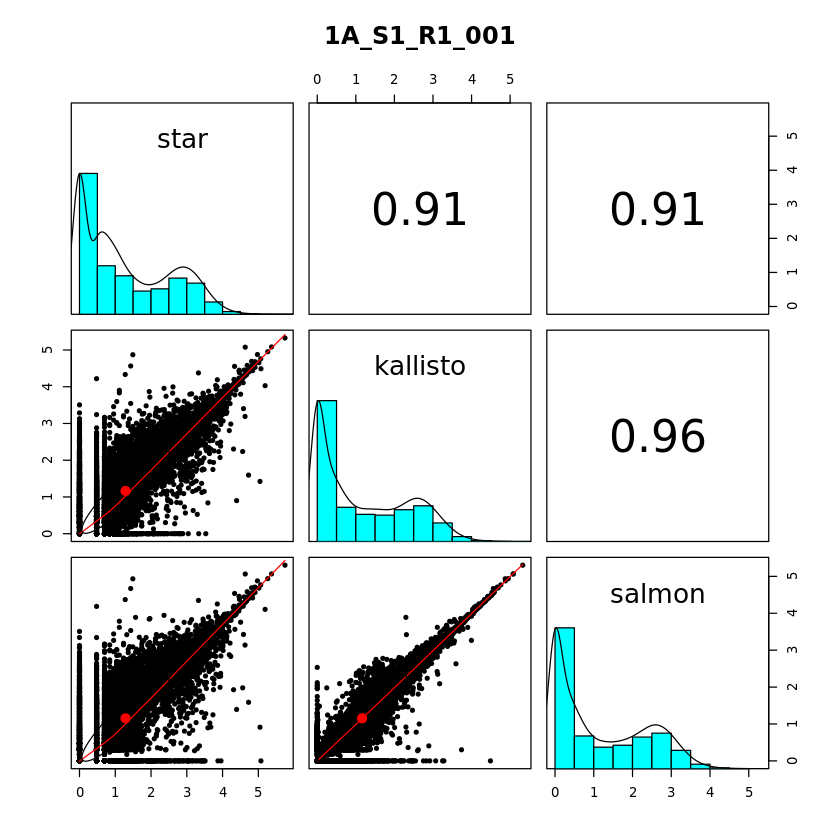

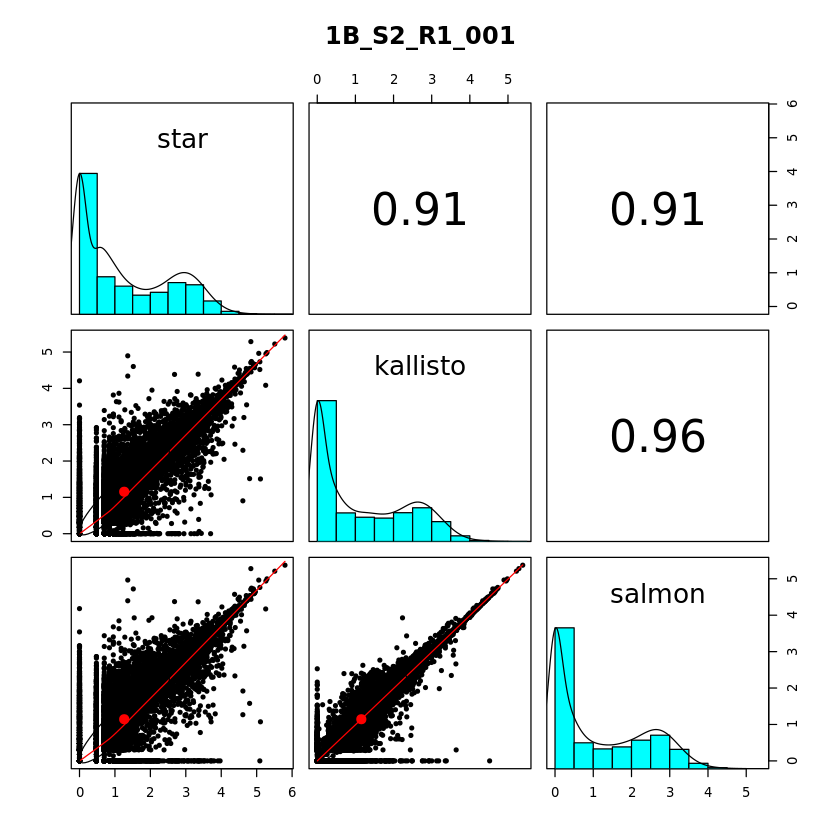

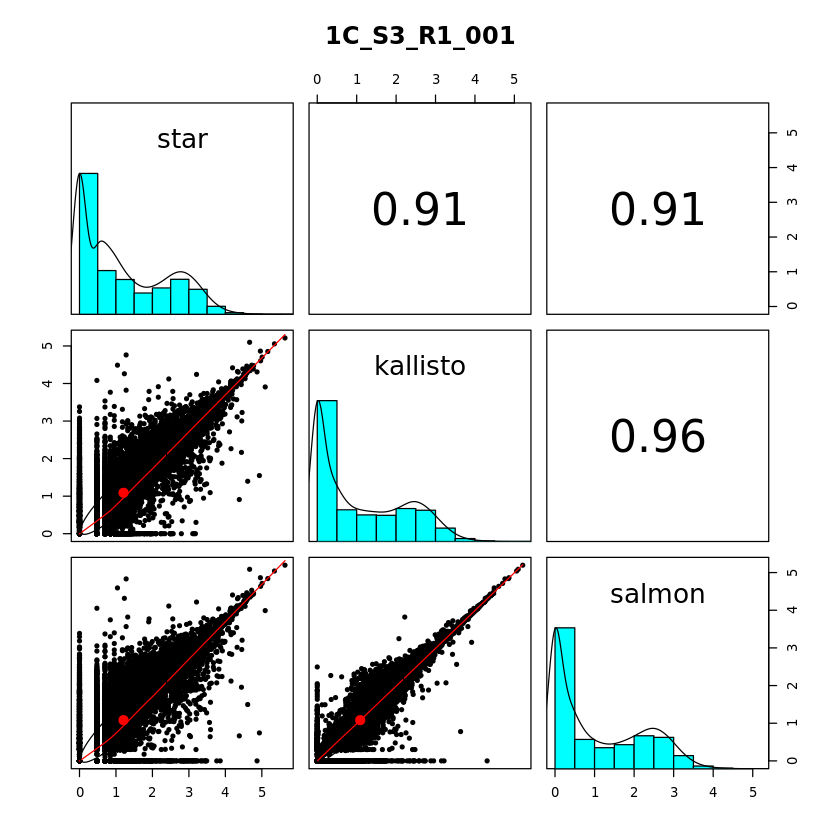

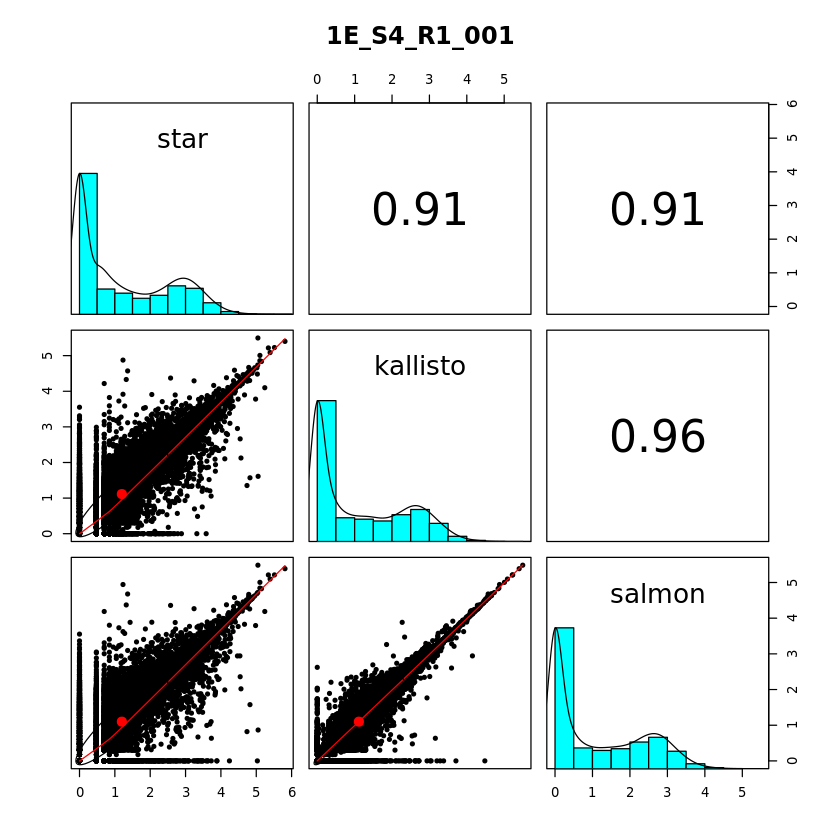

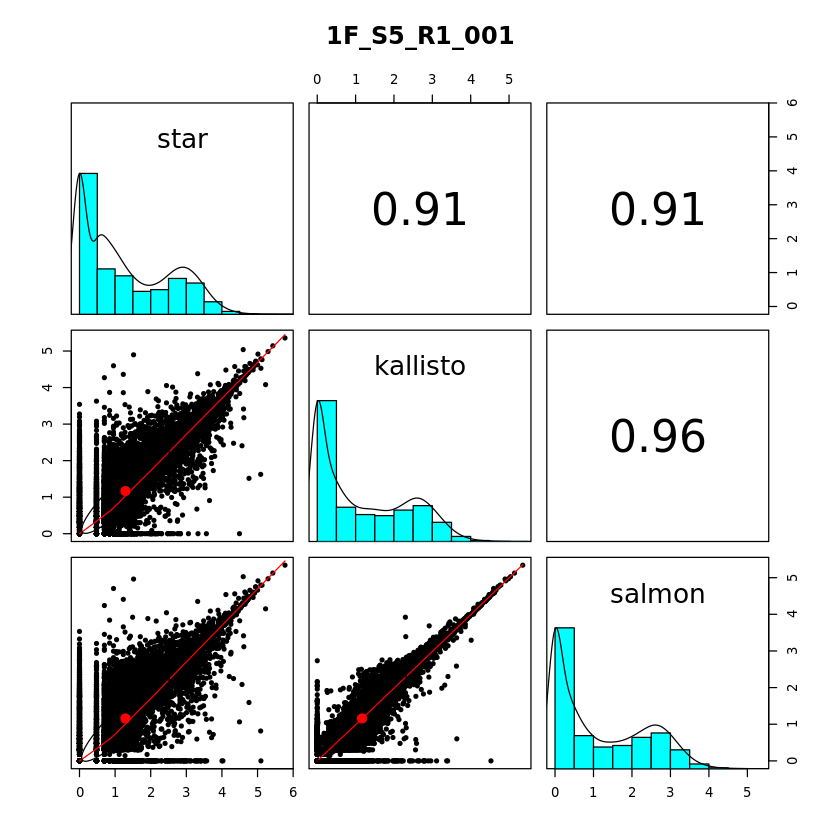

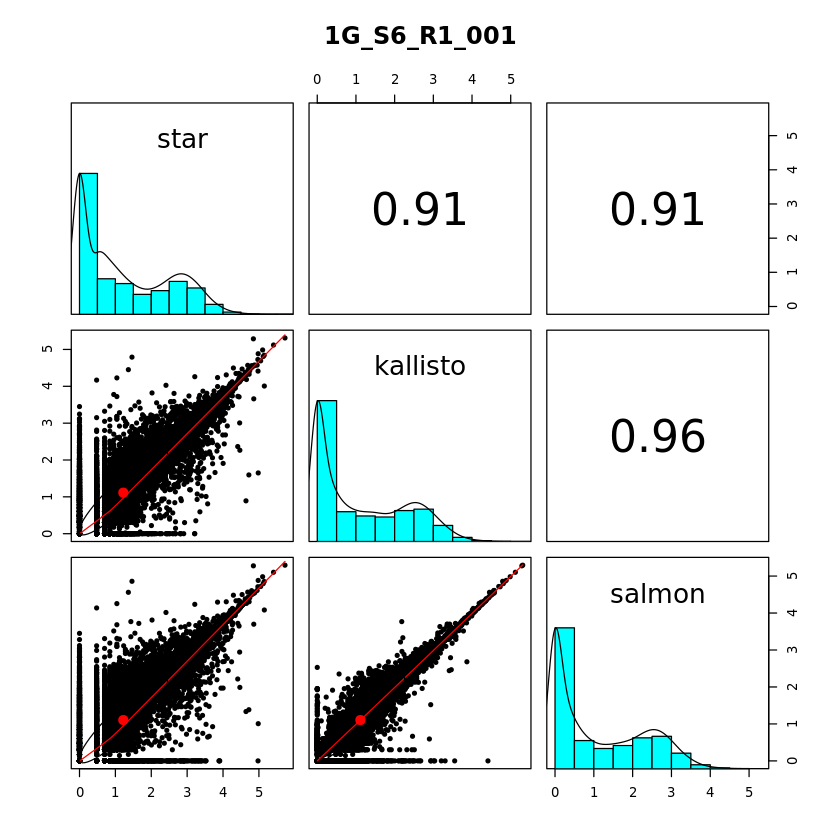

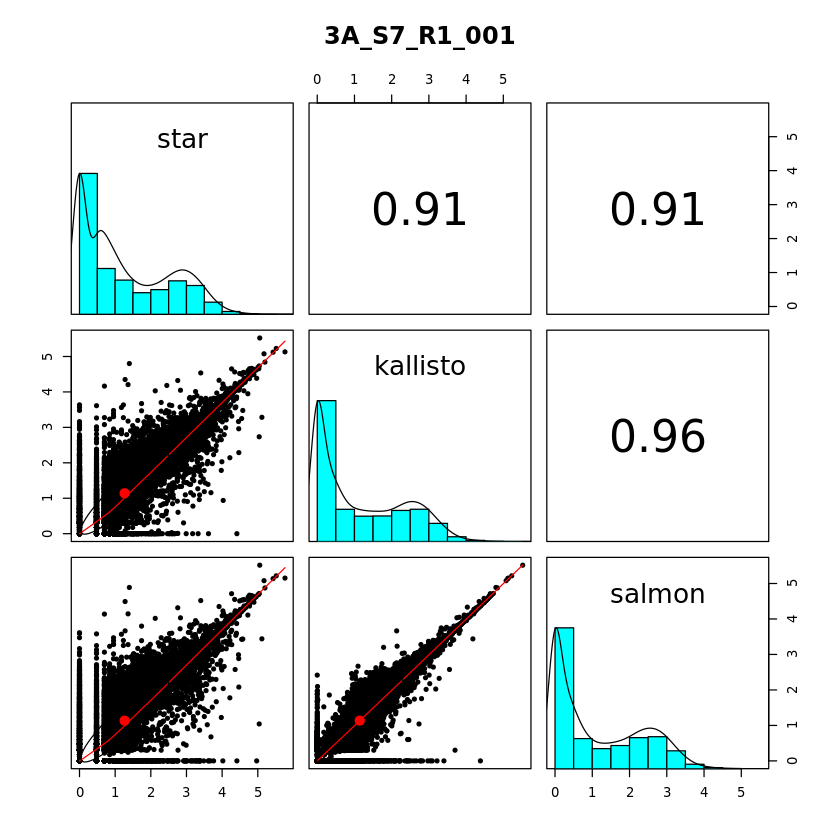

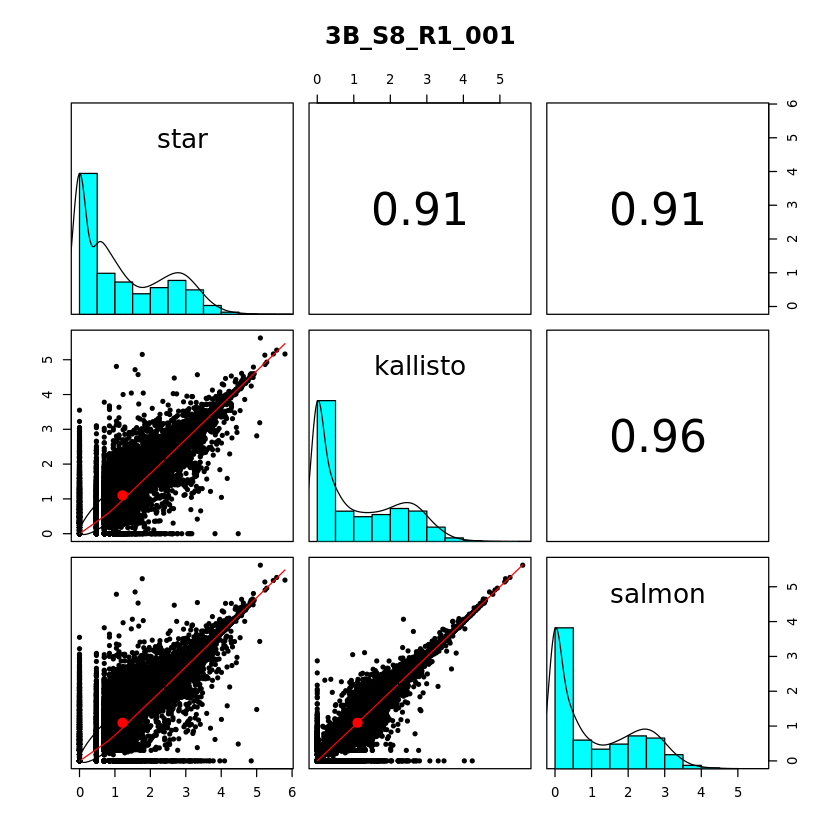

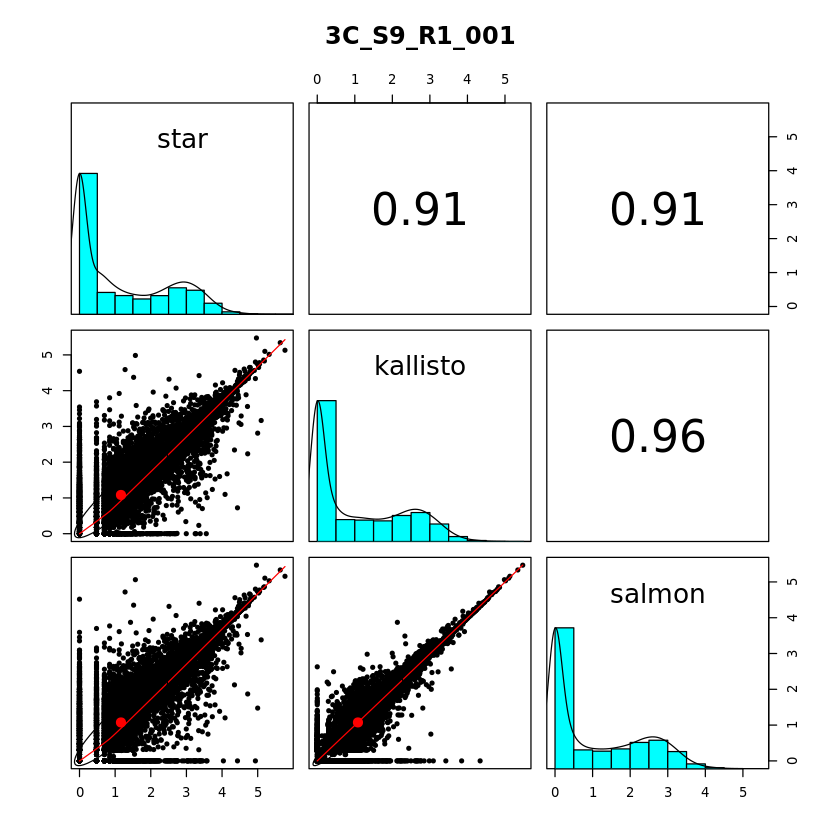

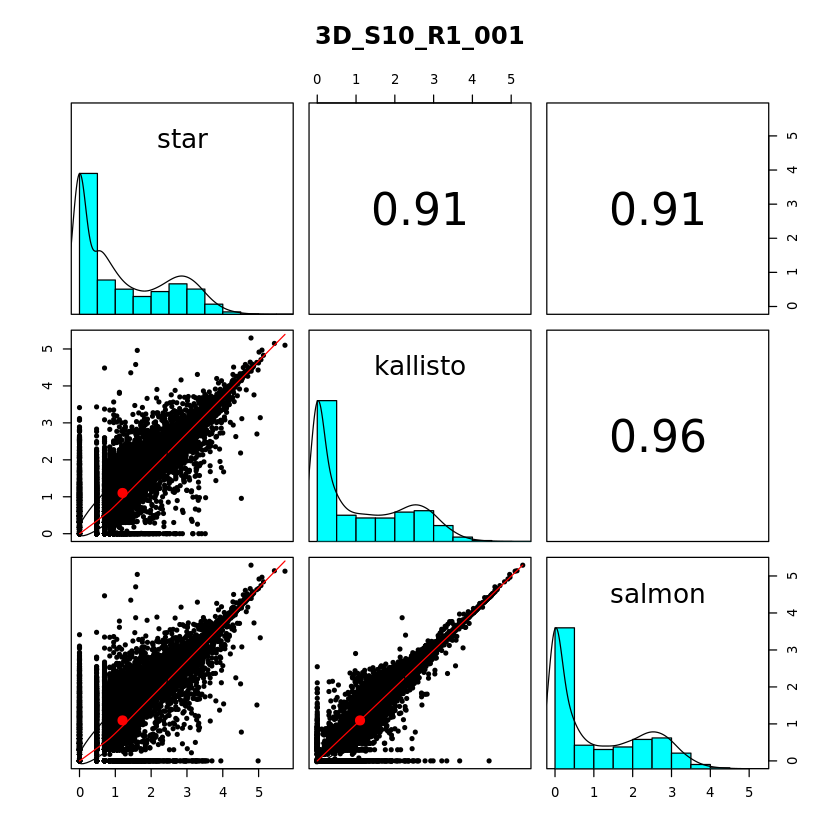

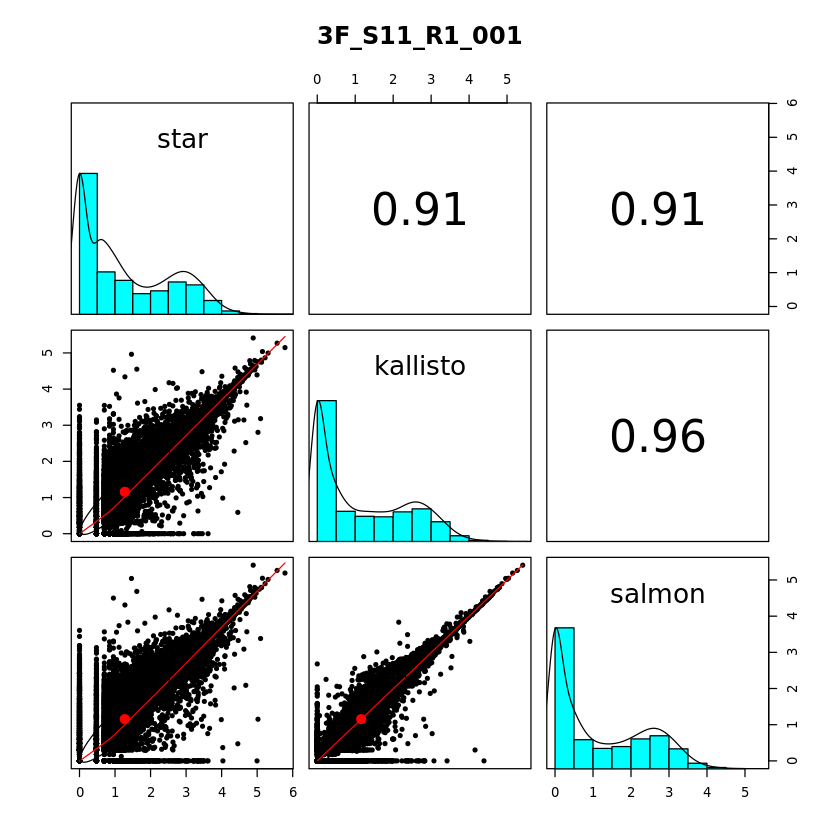

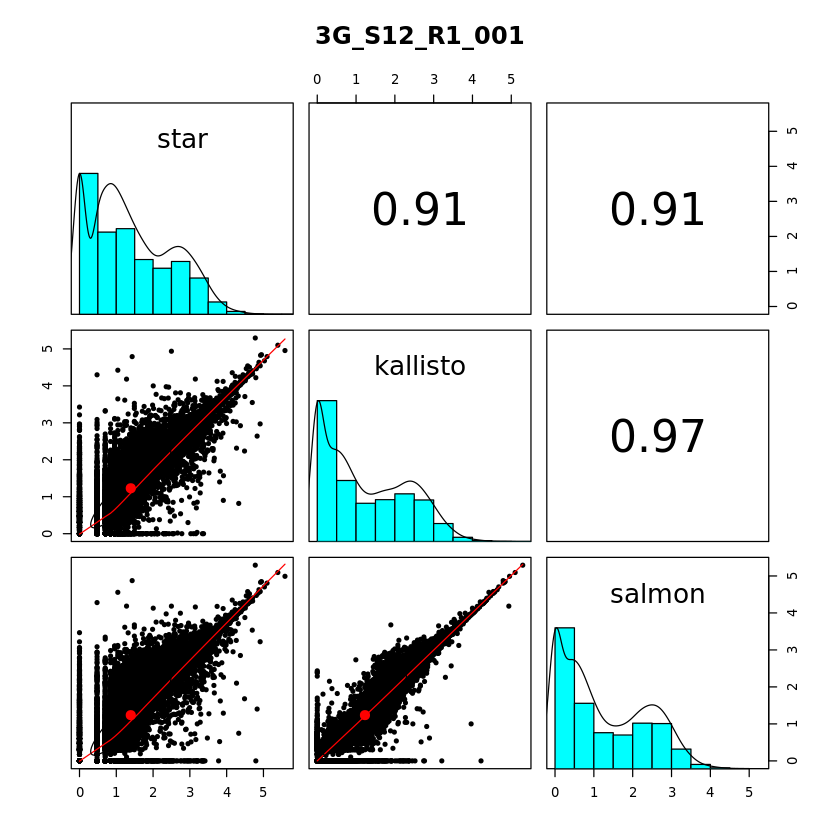

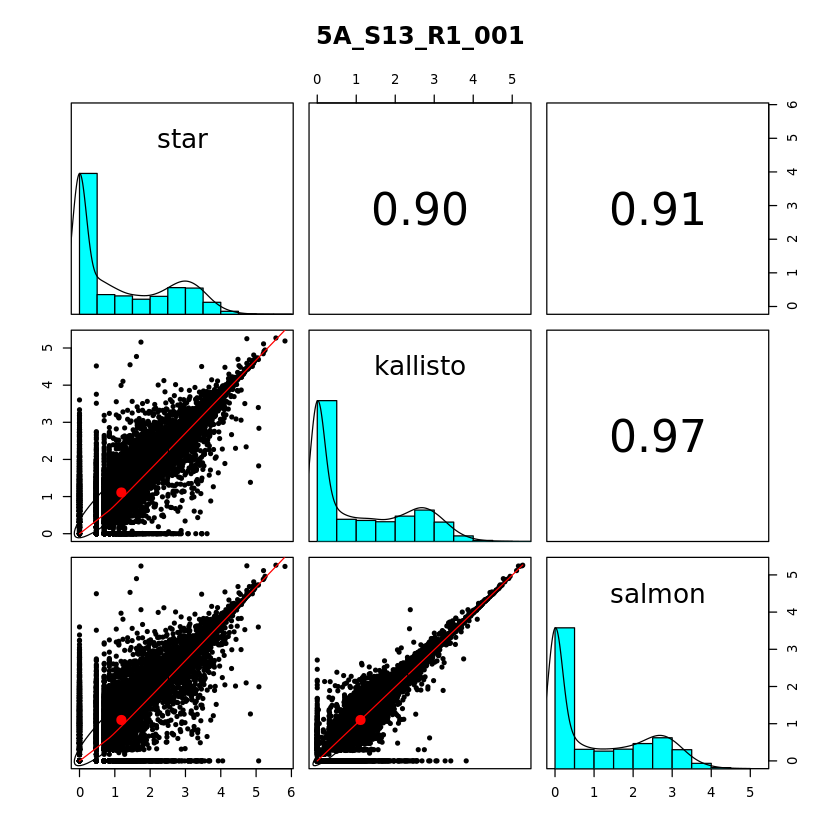

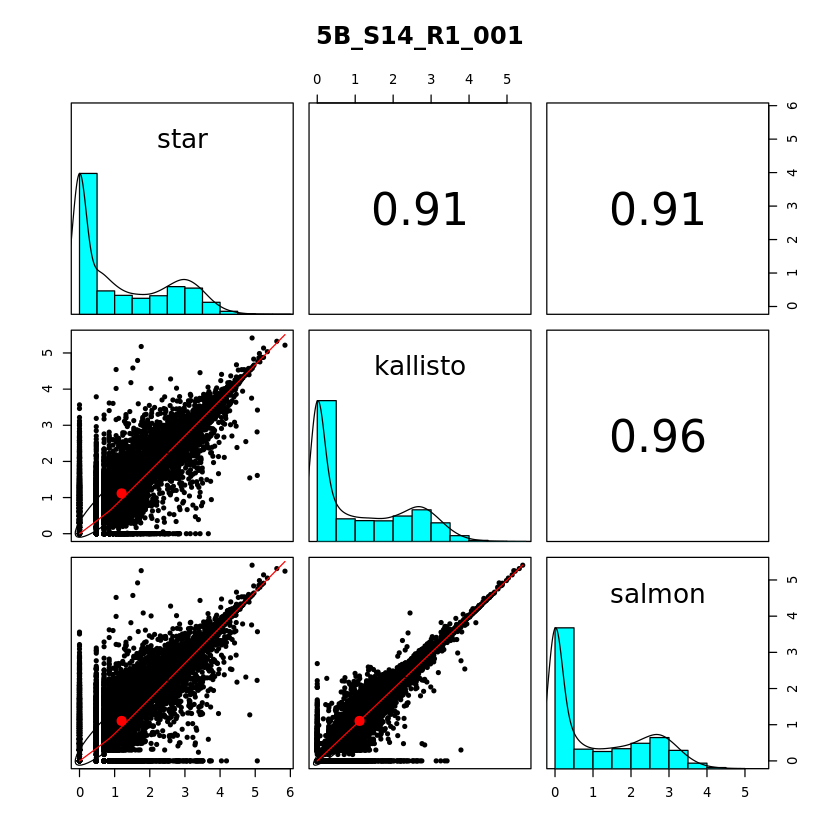

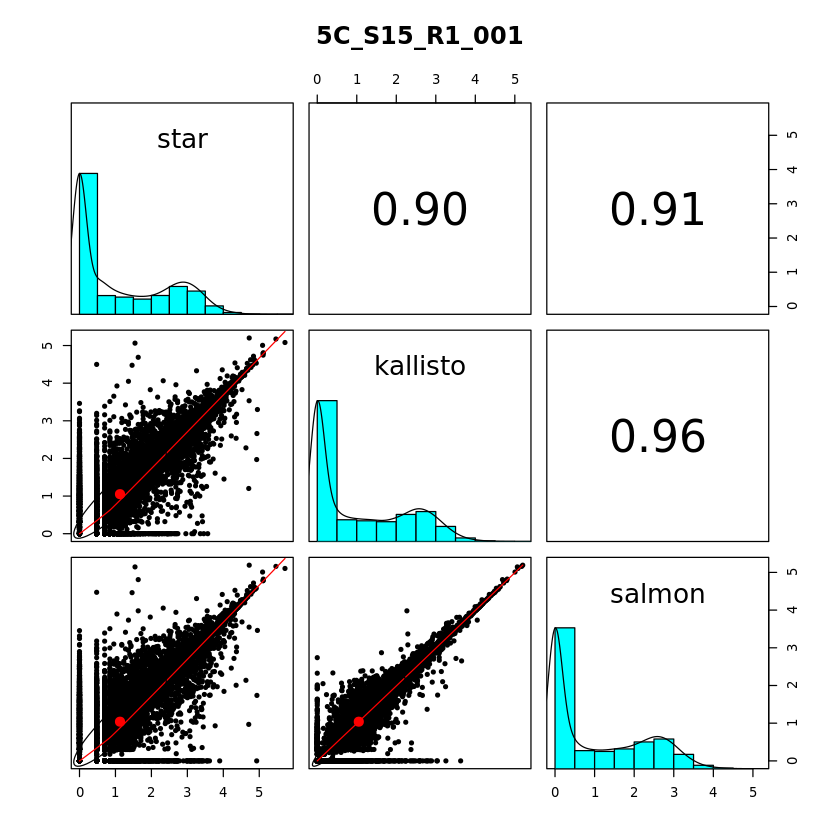

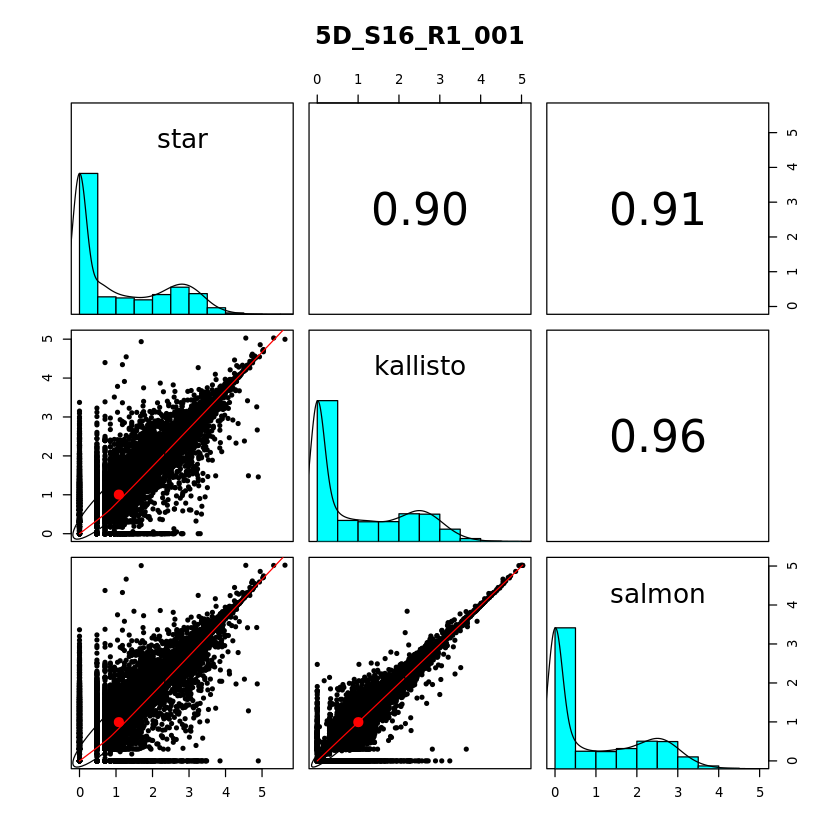

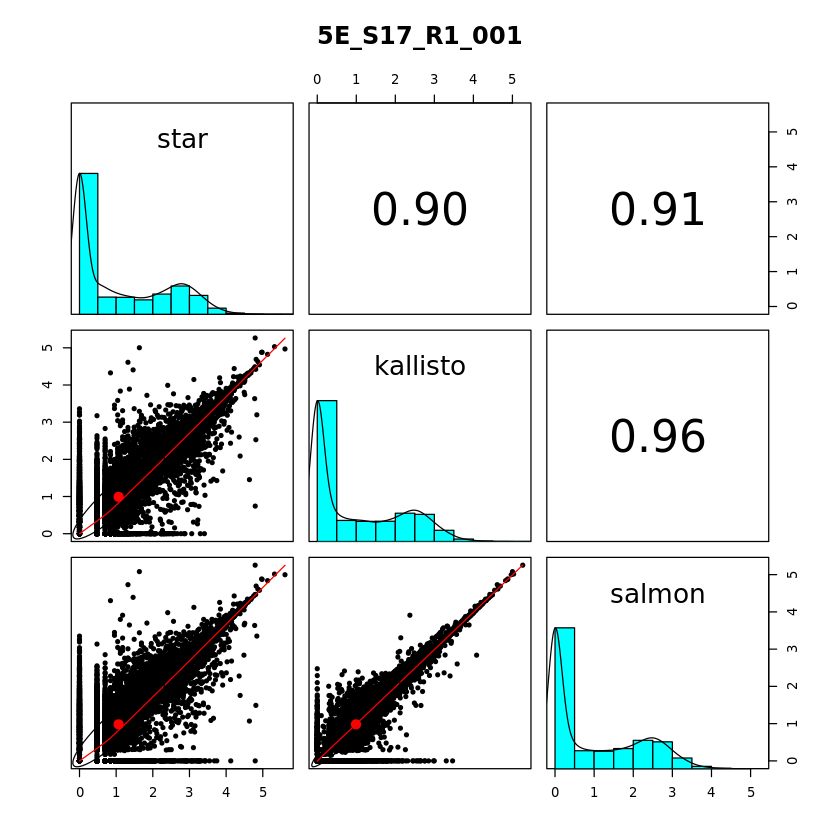

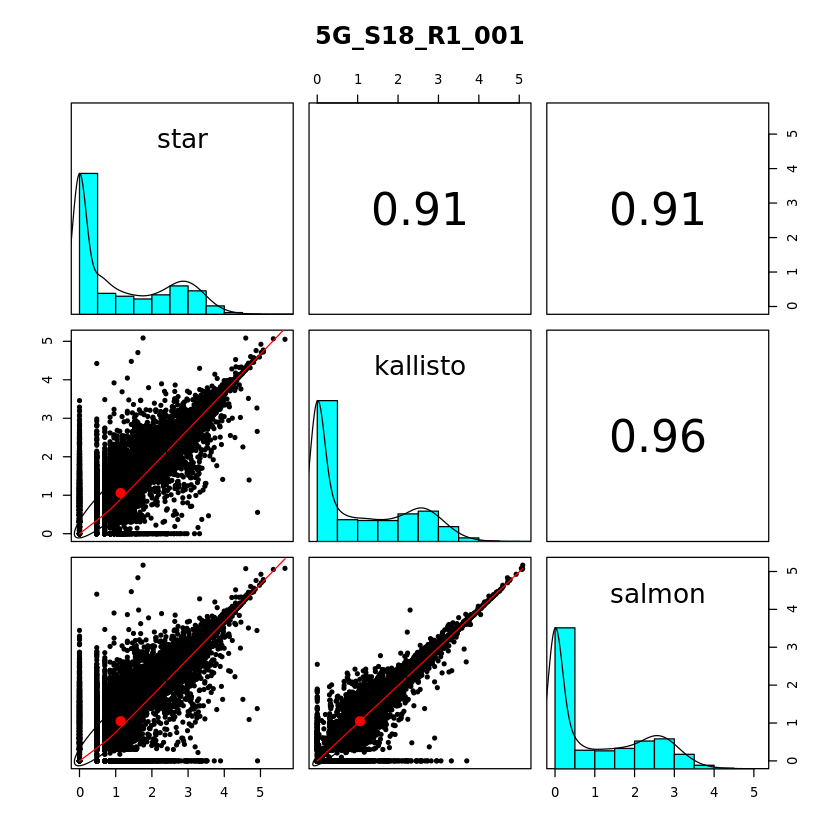

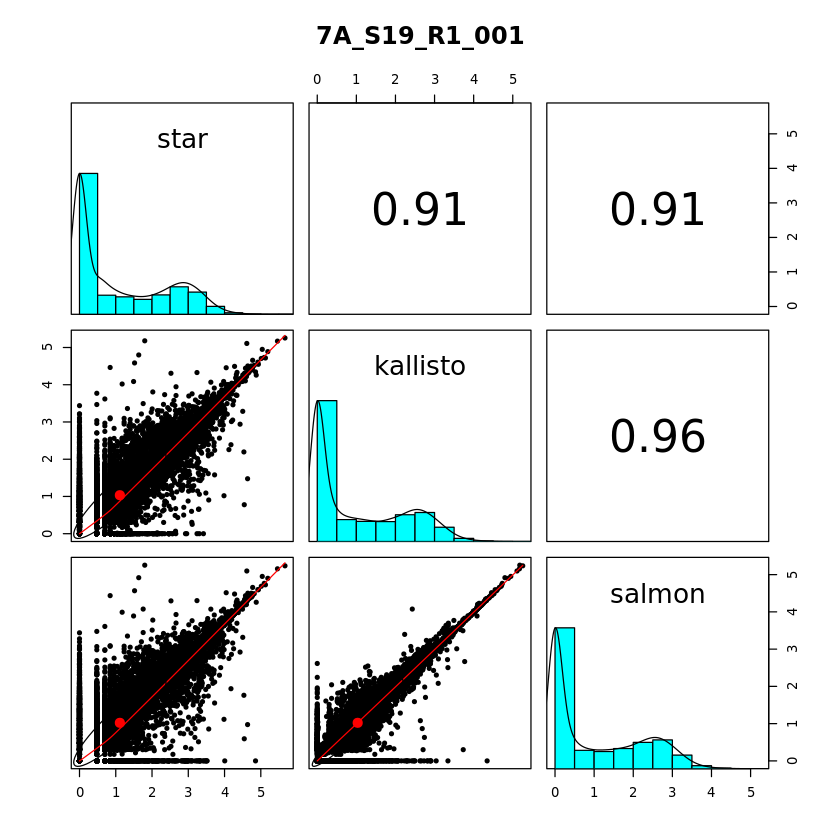

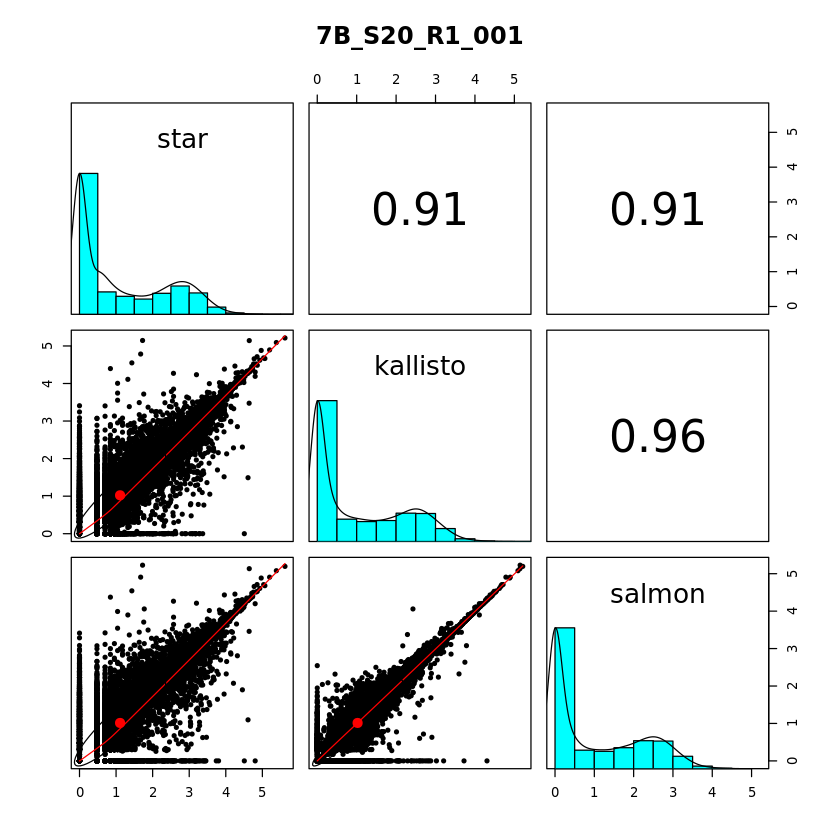

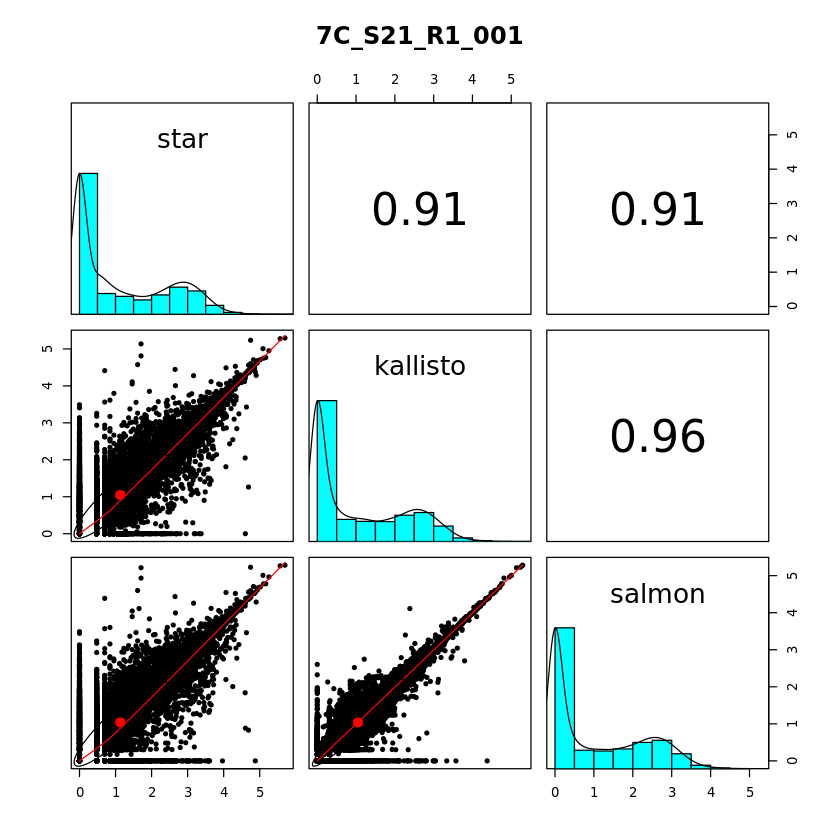

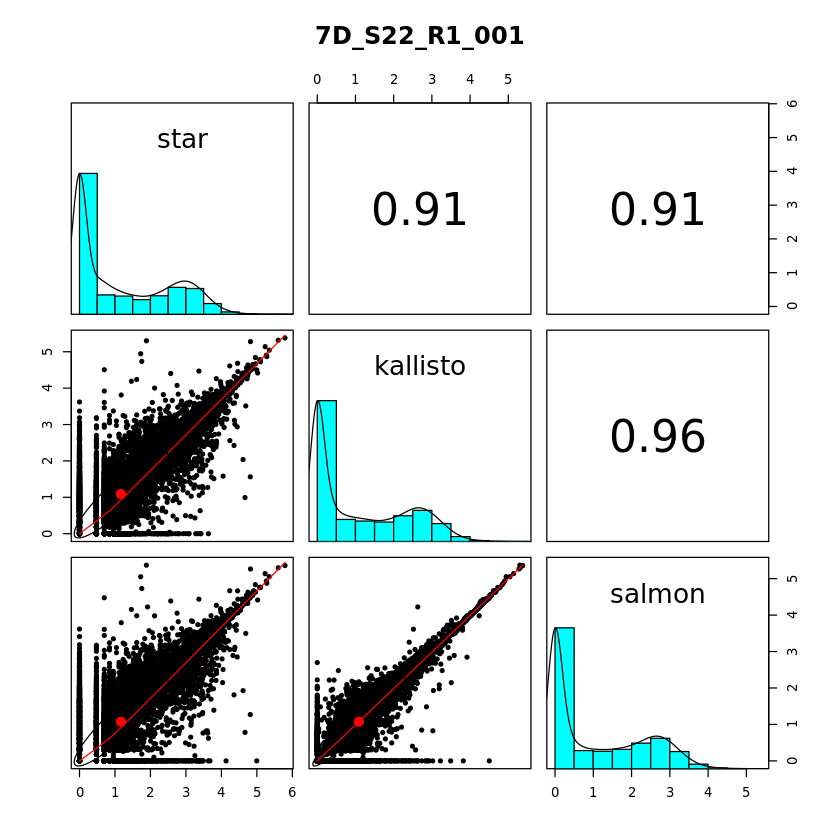

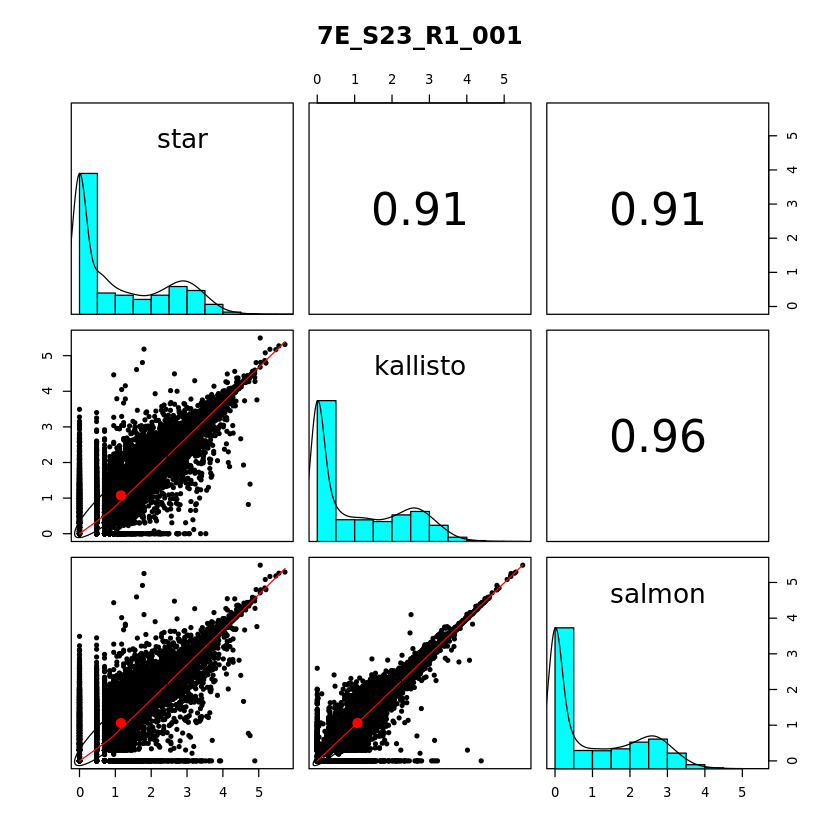

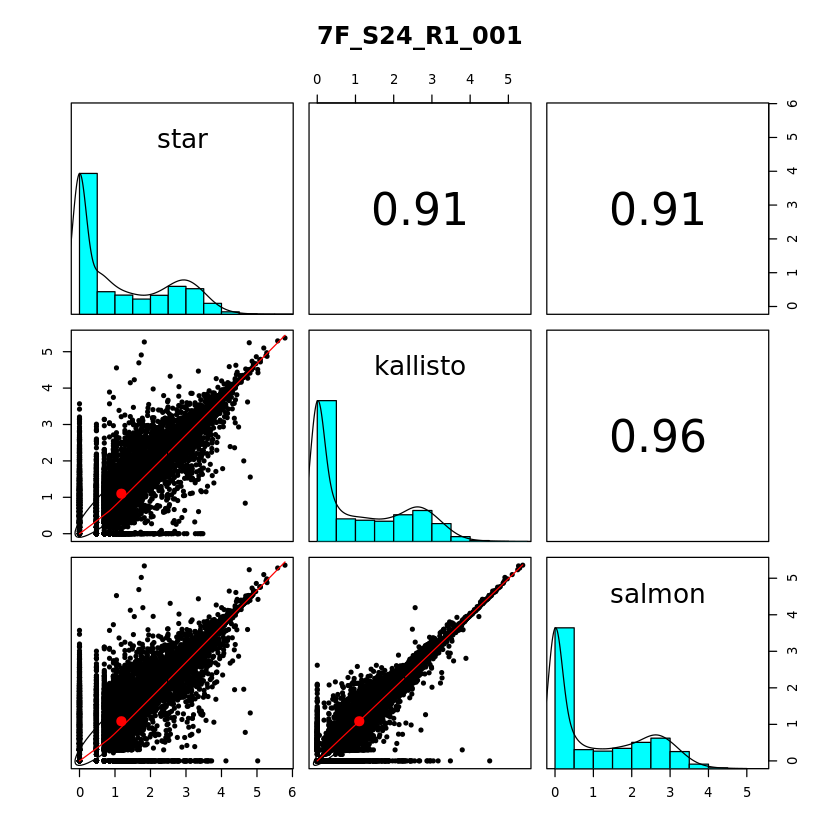

In [31]:
# Loop
for (sample in colnames(star_dataframe)) {
    
    # Get dataframe
    plot_dataframe <- data.frame(star=star_dataframe[genes,sample], kallisto=kallisto_dataframe[genes,sample], salmon=salmon_dataframe[genes, sample])
    plot_dataframe <- log10(plot_dataframe+1)
    
    # Plot
    psych::pairs.panels(plot_dataframe, method='spearman', rug=FALSE, main=sample)
    
}